In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [56]:
def extract_runtimes(file, run_header_pattern, epoch_pattern, total_pattern):
    # This will hold each run's data
    runs = []
    current_run = None

    # Open and read the file (change 'logfile.txt' to your filename)
    with open(file, "r") as f:
        for line in f:
            line = line.strip()

            # Check if the line is a run header
            run_header_match = run_header_pattern.match(line)
            if run_header_match:
                # Save the previous run if one exists
                if current_run:
                    runs.append(current_run)
                run_num, seed = run_header_match.groups()
                current_run = {
                    "run": int(run_num),
                    "seed": int(seed),
                    "epochs": [],  # List to hold (epoch number, runtime)
                    "total_runtime": None,  # This will be updated later
                }
                continue

            # Check if the line is an epoch runtime entry
            epoch_match = epoch_pattern.match(line)
            if epoch_match and current_run is not None:
                if len(epoch_match.groups()) == 2:
                    epoch_num, runtime = epoch_match.groups()
                    current_run["epochs"].append((int(epoch_num), float(runtime)))
                    continue
                elif len(epoch_match.groups()) == 3:
                    _, epoch_num, runtime = epoch_match.groups()
                    current_run["epochs"].append((int(epoch_num), float(runtime)))
                    continue

            # Check if the line is a total runtime entry
            total_match = total_pattern.match(line)
            if total_match and current_run is not None:
                _, total_runtime = total_match.groups()
                current_run["total_runtime"] = float(total_runtime)
                continue

        # Append the last run after loop ends
        if current_run:
            runs.append(current_run)

    # Build a table (pandas DataFrame) that lists each run and its epochs.
    # You can choose to have a row for every epoch, including total runtime replicated for that run.
    rows = []
    for run in runs:
        for epoch_num, epoch_time in run["epochs"]:
            rows.append(
                {
                    "Run": run["run"],
                    "Seed": run["seed"],
                    "Epoch": epoch_num,
                    "Epoch Runtime (s)": epoch_time,
                    "Total Runtime (s)": run["total_runtime"],
                }
            )

    df = pd.DataFrame(rows)
    return df

In [57]:
# MODIG
# Regular expression patterns.
# This pattern looks for a run header, e.g.: "####### Run 0 for seed 0"
run_header_pattern = re.compile(r"^####### Run (\d+) for seed (\d+)")
# This pattern matches a per epoch runtime, e.g.: "Epoch 1 runtime: 18.58 seconds"
epoch_pattern = re.compile(r"^Epoch (\d+) runtime: ([\d.]+) seconds")
# This pattern matches the total runtime, e.g.: "Run 0 total runtime: 1458.28 seconds"
total_pattern = re.compile(r"^Run (\d+) total runtime: ([\d.]+) seconds")

modig_file = "../results/modig_runtime.txt"

modig_df = extract_runtimes(
    modig_file, run_header_pattern, epoch_pattern, total_pattern
)

# calculate the mean and standard deviation for epoch runtimes per run.
group_stats = modig_df["Epoch Runtime (s)"].agg(["mean", "std"]).reset_index()
total_runtime_stats = modig_df["Total Runtime (s)"].agg(["mean", "std"]).reset_index()
print("\nMean and Standard Deviation of Epoch Runtimes per Run:")
print(group_stats)
print("\nMean and Standard Deviation of Total Runtimes:")
print(total_runtime_stats)


Mean and Standard Deviation of Epoch Runtimes per Run:
  index  Epoch Runtime (s)
0  mean          18.632663
1   std           1.167564

Mean and Standard Deviation of Total Runtimes:
  index  Total Runtime (s)
0  mean        1582.117870
1   std         116.368243


In [62]:
# MDMNI
# Regular expression patterns.
# This pattern looks for a run header, e.g.: "####### Run 0 for seed 0"
run_header_pattern = re.compile(r"^####### Run (\d+) for seed (\d+)")
# This pattern matches a per epoch runtime, e.g.: "Epoch 1 runtime: 18.58 seconds"
epoch_pattern = re.compile(r"^Run (\d+) - Epoch (\d+) runtime: ([\d.]+) seconds")
# This pattern matches the total runtime, e.g.: "Run 0 total runtime: 1458.28 seconds"
total_pattern = re.compile(r"^Run (\d+) total runtime: ([\d.]+) seconds")

mdmni_file = "../results/mdmni_runtime.txt"

mdmni_df = extract_runtimes(
    mdmni_file, run_header_pattern, epoch_pattern, total_pattern
)

# calculate the mean and standard deviation for epoch runtimes per run.
group_stats = mdmni_df["Epoch Runtime (s)"].agg(["mean", "std"]).reset_index()
total_runtime_stats = mdmni_df["Total Runtime (s)"].agg(["mean", "std"]).reset_index()
print("\nMean and Standard Deviation of Epoch Runtimes per Run:")
print(group_stats)
print("\nMean and Standard Deviation of Total Runtimes:")
print(total_runtime_stats)


Mean and Standard Deviation of Epoch Runtimes per Run:
  index  Epoch Runtime (s)
0  mean           5.688090
1   std           0.815988

Mean and Standard Deviation of Total Runtimes:
  index  Total Runtime (s)
0  mean         566.079799
1   std          15.919849


In [65]:
# MDMNI
# Regular expression patterns.
# This pattern looks for a run header, e.g.: "####### Run 0 for seed 0"
run_header_pattern = re.compile(r"^####### Run (\d+) for seed (\d+)")
# This pattern matches a per epoch runtime, e.g.: "Epoch 1 runtime: 18.58 seconds"
epoch_pattern = re.compile(
    r"^#\s*Epoch\s+(\d+):.*?Epoch\s+\1\s+runtime:\s+([\d.]+)\s+seconds"
)
# This pattern matches the total runtime, e.g.: "Run 0 total runtime: 1458.28 seconds"
total_pattern = re.compile(r"^Run (\d+) total runtime: ([\d.]+) seconds")

morgan_file = "../results/morgan_runtime.txt"

morgan_df = extract_runtimes(
    morgan_file, run_header_pattern, epoch_pattern, total_pattern
)

# calculate the mean and standard deviation for epoch runtimes per run.
group_stats = morgan_df["Epoch Runtime (s)"].agg(["mean", "std"]).reset_index()
total_runtime_stats = morgan_df["Total Runtime (s)"].agg(["mean", "std"]).reset_index()
print("\nMean and Standard Deviation of Epoch Runtimes per Run:")
print(group_stats)
print("\nMean and Standard Deviation of Total Runtimes:")
print(total_runtime_stats)


Mean and Standard Deviation of Epoch Runtimes per Run:
  index  Epoch Runtime (s)
0  mean           0.234050
1   std           0.071193

Mean and Standard Deviation of Total Runtimes:
  index  Total Runtime (s)
0  mean          72.980000
1   std           2.947378


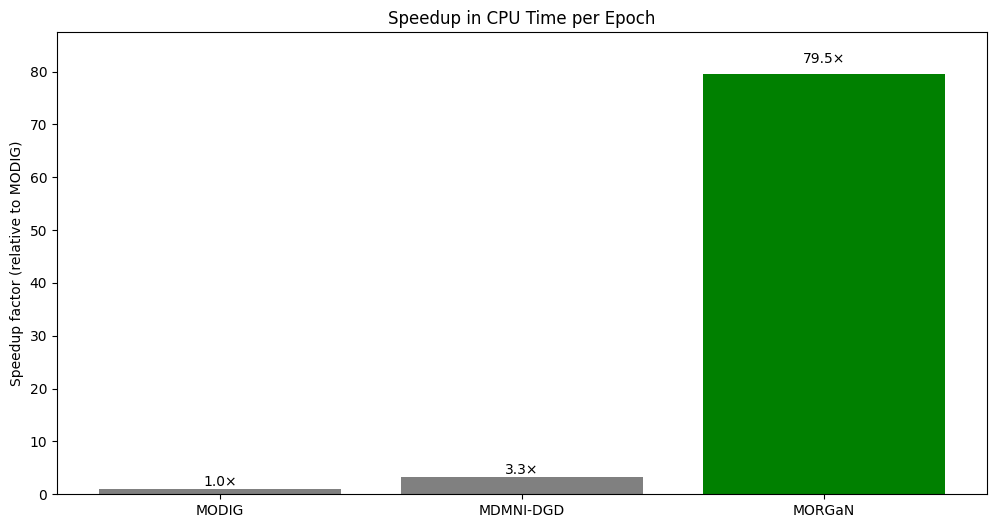

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Average CPU times per epoch for the three methods
models = ["MODIG", "MDMNI-DGD", "MORGaN"]
cpu_times = [18.599, 5.688, 0.234]

# Compute speedup relative to MODIG
speedups = [1, 18.599 / 5.688, 18.599 / 0.234]

plt.figure(figsize=(12, 6))
bars = plt.bar(models, speedups, color=["gray", "gray", "green"])
plt.ylabel("Speedup factor (relative to MODIG)")
plt.title("Speedup in CPU Time per Epoch")
plt.ylim(0, max(speedups) * 1.1)

# Adding text label for each bar
for bar, speed in zip(bars, speedups):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() * 1.02,
        f"{speed:.1f}×",
        ha="center",
        va="bottom",
    )

plt.savefig("../figures/speedup_per_epoch.png", dpi=300, bbox_inches="tight")
plt.show()